# 1. Imports

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import helpers

# 2. Data Loading

In [2]:
data = pd.read_csv("../data/body_level_classification_train.csv")
x = data.drop('Body_Level', axis=1)
y = data['Body_Level']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=31) #31

class_column = 'Body_Level'
class_labels = ['Body Level 1', 'Body Level 2', 'Body Level 3', 'Body Level 4']
class_colors = ['blue','orange', 'green', 'red']
numeric_columns = x_train.select_dtypes(include=[float, int]).columns
categorical_columns = [x for x in x_train.columns if x not in numeric_columns]

print("Training set size:", len(x_train))
print("Testing set size:", len(x_test))


Training set size: 1181
Testing set size: 296


# 3. Data Visualization

In [3]:
data.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [4]:
# is there is empty data ?
data.isnull().sum()

Gender                0
Age                   0
Height                0
Weight                0
H_Cal_Consump         0
Veg_Consump           0
Water_Consump         0
Alcohol_Consump       0
Smoking               0
Meal_Count            0
Food_Between_Meals    0
Fam_Hist              0
H_Cal_Burn            0
Phys_Act              0
Time_E_Dev            0
Transport             0
Body_Level            0
dtype: int64

In [5]:
# is there is empty data ?
y_train.value_counts()

Body_Level
Body Level 4    537
Body Level 3    331
Body Level 2    160
Body Level 1    153
Name: count, dtype: int64

<AxesSubplot:xlabel='Body_Level', ylabel='count'>

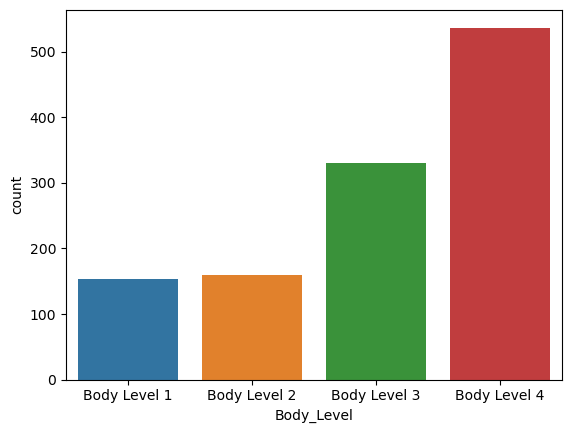

In [6]:
# check class imbalancing
sns.countplot(x=y_train, order=class_labels)

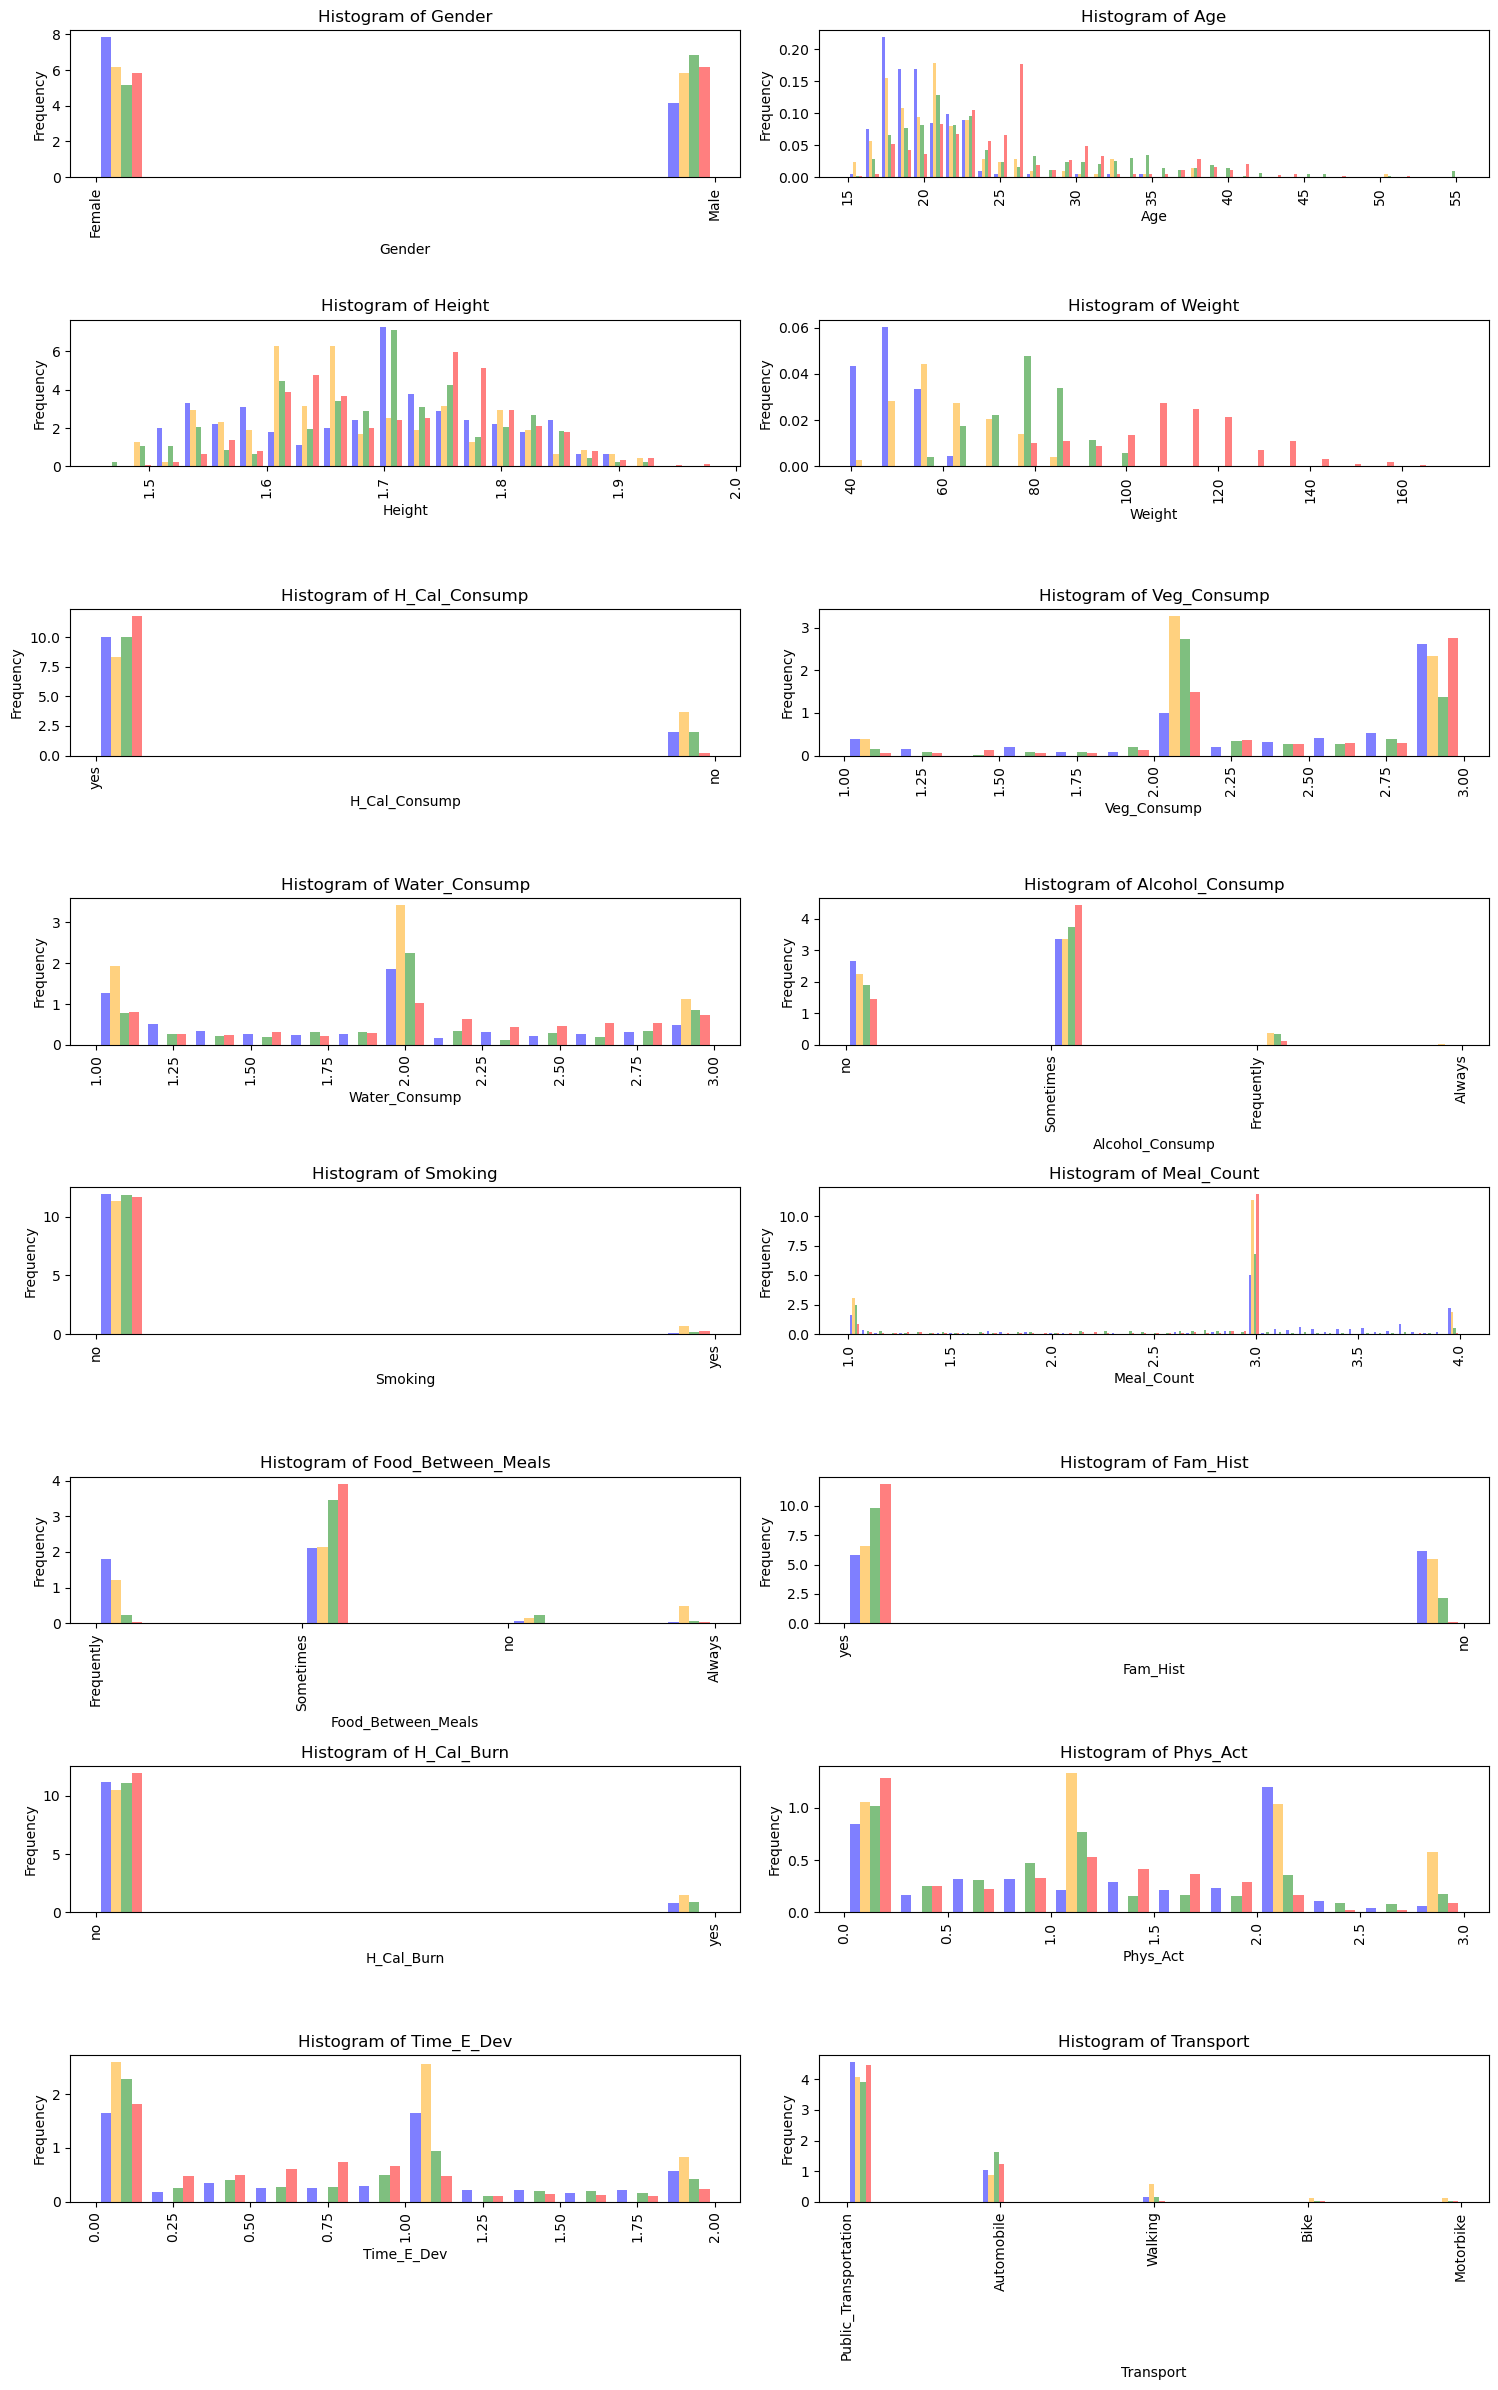

In [7]:

helpers.draw_hists(x_train.columns, data, class_column, class_labels, class_colors)


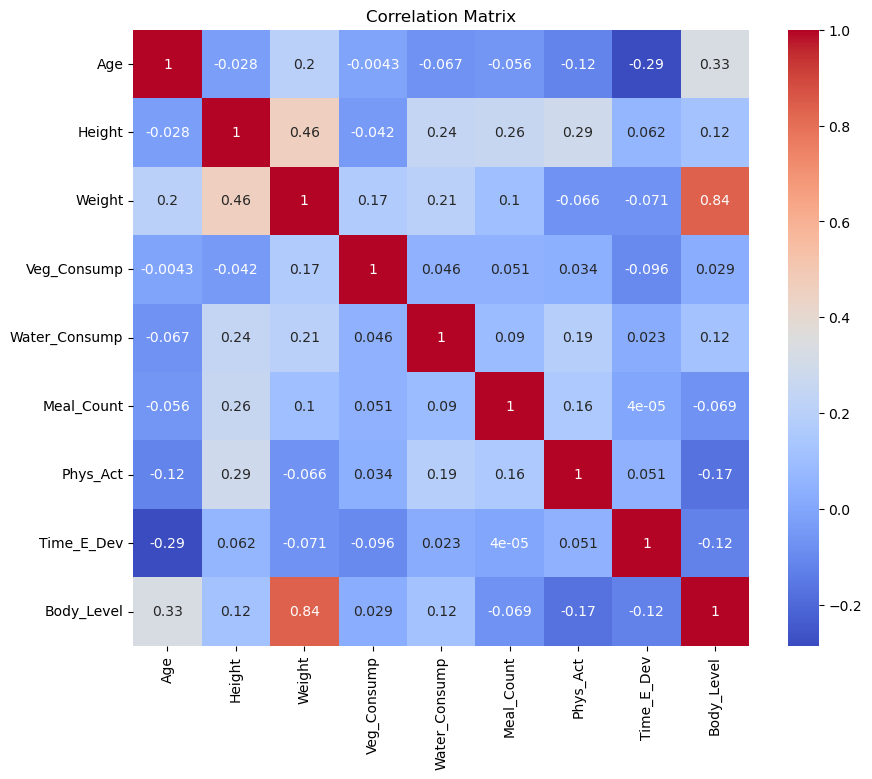

In [8]:
helpers.draw_corr_heatmap(x_train, y_train, numeric_columns)

# 4. handle class imbalance

In [9]:

x_train_sampled, y_train_sampled = helpers.class_balance(x_train, y_train, oversampling_only=True)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa4af743a60>
Traceback (most recent call last):
  File "/home/makrion/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/makrion/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/makrion/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/makrion/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

Body_Level
Body Level 3    537
Body Level 1    537
Body Level 4    537
Body Level 2    537
Name: count, dtype: int64


<AxesSubplot:xlabel='Body_Level', ylabel='count'>

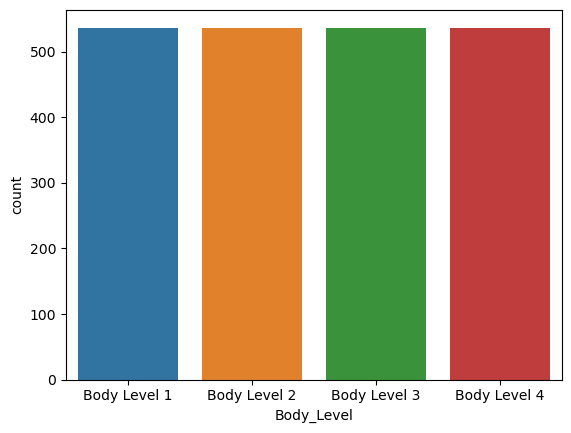

In [10]:
# check class imbalancing
print(y_train_sampled.value_counts())
sns.countplot(x=y_train_sampled, order=class_labels)

In [11]:
# is there is empty data ?
x_train_sampled.isnull().sum()

Gender                0
Age                   0
Height                0
Weight                0
H_Cal_Consump         0
Veg_Consump           0
Water_Consump         0
Alcohol_Consump       0
Smoking               0
Meal_Count            0
Food_Between_Meals    0
Fam_Hist              0
H_Cal_Burn            0
Phys_Act              0
Time_E_Dev            0
Transport             0
dtype: int64

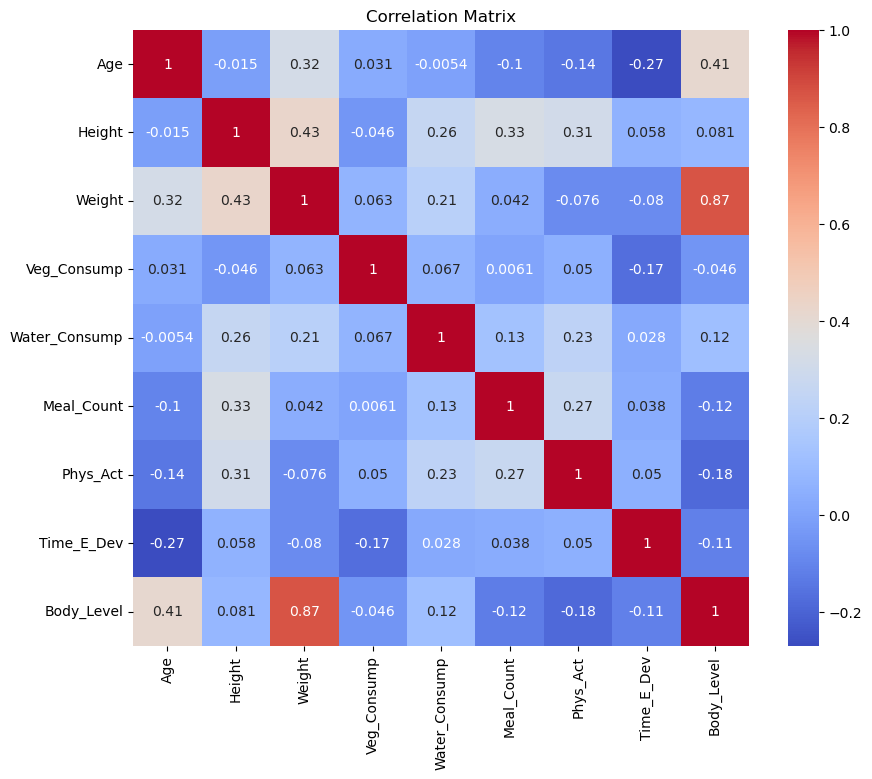

In [12]:
helpers.draw_corr_heatmap(x_train_sampled,y_train_sampled, numeric_columns)

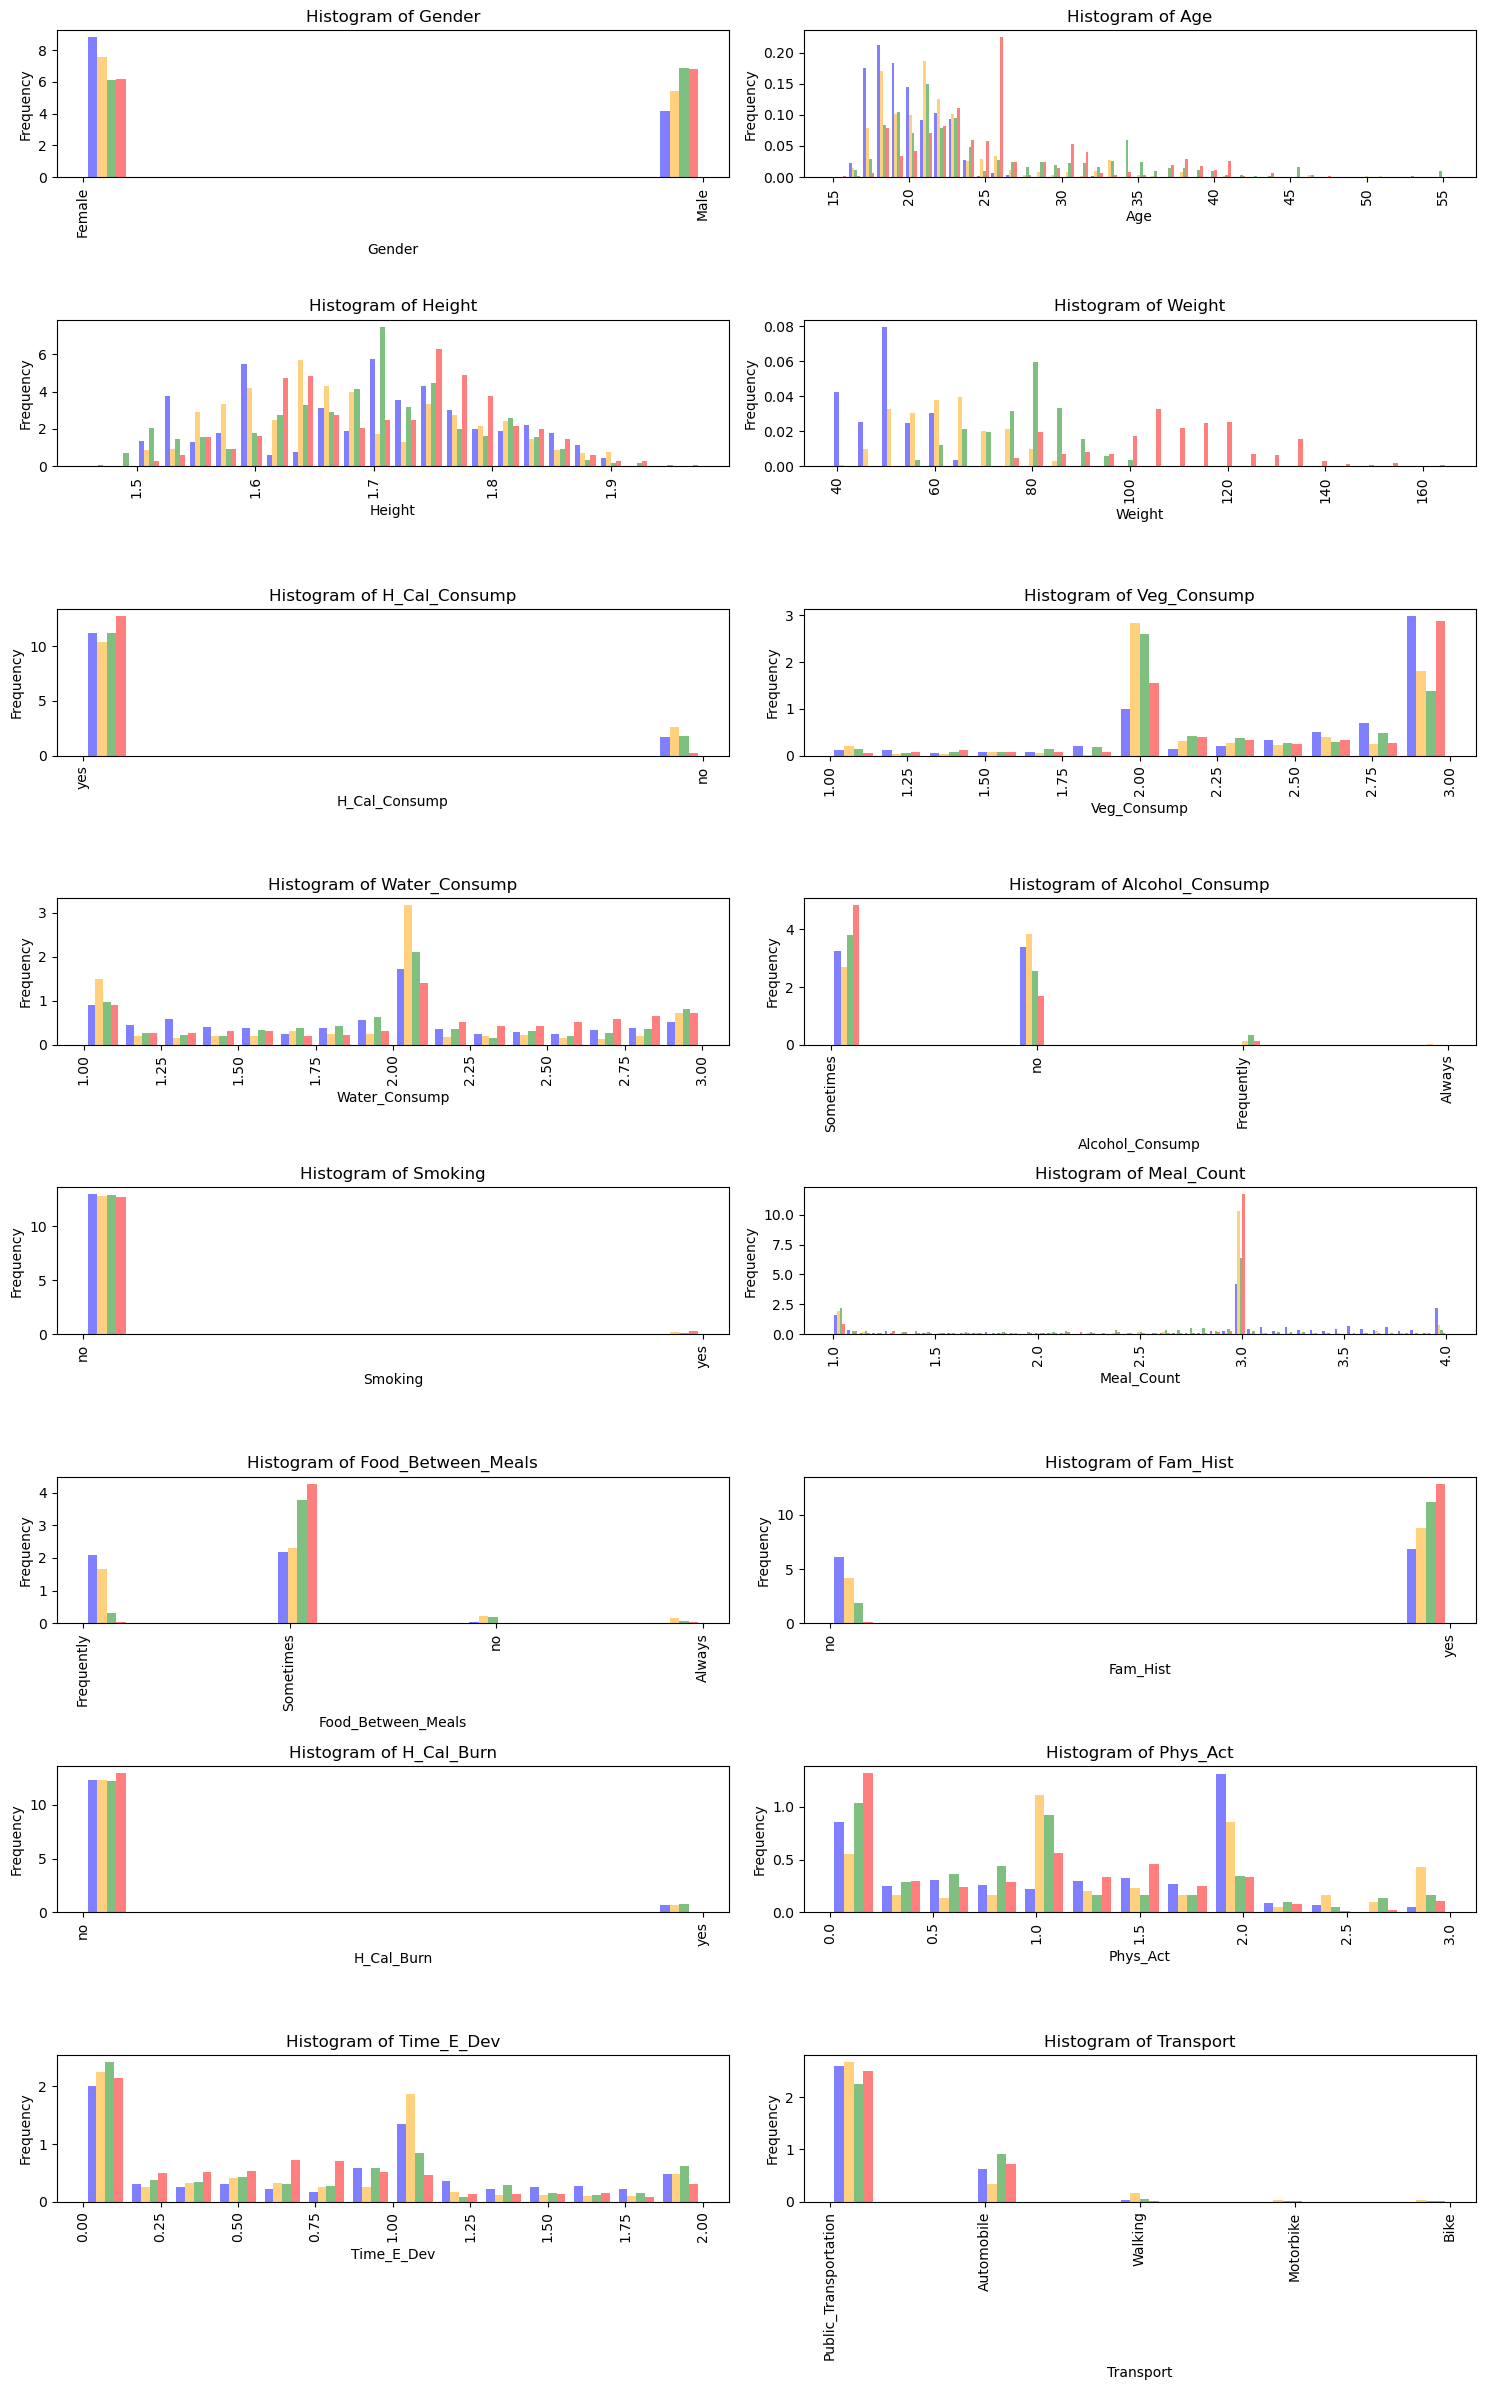

In [13]:
train_sampled = x_train_sampled.copy()
train_sampled = helpers.categorical_values_decoding(train_sampled)
train_sampled.loc[:, class_column] = y_train_sampled

helpers.draw_hists(x_train_sampled.columns, train_sampled, class_column, class_labels, class_colors)

# 5. Models

#### trying to test on unbalanced row data

In [14]:
docs = []

In [15]:
# Create a ZeroR classifier
baseline_classifier = DummyClassifier(strategy="most_frequent")
print("baseline classifier results:\n")
baseline_classifier,doc = helpers.test_model(baseline_classifier, x_train_sampled, y_train_sampled, x_test, y_test)
docs.append(doc)


baseline classifier results:

     out of sample ( predict(test) ):
         accuracy: 12.5
         weighted F1 score: 2.7777777777777777

     in sample ( predict(train) ):
         accuracy: 25.0
         weighted F1 score: 10.0


In [16]:
# Create a perceptron classifier
perceptron_classifier = Perceptron()
print("perceptron classifier results:\n")
perceptron_classifier, doc = helpers.test_model(perceptron_classifier, x_train_sampled, y_train_sampled, x_test, y_test)
docs.append(doc)

perceptron classifier results:

     out of sample ( predict(test) ):
         accuracy: 61.14864864864865
         weighted F1 score: 56.43089226775667

     in sample ( predict(train) ):
         accuracy: 50.93109869646183
         weighted F1 score: 41.92285946314654


In [17]:
# Create a linear regression classifier
linearregression_classifier = LinearRegression()
print("linear regression classifier results:\n")
linearregression_classifier, doc = helpers.test_model(linearregression_classifier, x_train_sampled, y_train_sampled, x_test, y_test)
docs.append(doc)

linear regression classifier results:

     out of sample ( predict(test) ):
         accuracy: 84.7972972972973
         weighted F1 score: 85.30297526214295

     in sample ( predict(train) ):
         accuracy: 86.87150837988827
         weighted F1 score: 87.04889134997828


In [18]:
# Create a logistic regression classifier
logisticregression_classifier = LogisticRegression(max_iter=10000)
print("logistic regression classifier results:\n")
logisticregression_classifier, doc = helpers.test_model(logisticregression_classifier, x_train_sampled, y_train_sampled, x_test, y_test)
docs.append(doc)

logistic regression classifier results:

     out of sample ( predict(test) ):
         accuracy: 87.83783783783784
         weighted F1 score: 87.64777650194216

     in sample ( predict(train) ):
         accuracy: 88.91992551210429
         weighted F1 score: 88.84258663034778


In [19]:
# Create a base classifier
base_classifier = DecisionTreeClassifier(max_depth=5)
# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(estimator=base_classifier, n_estimators=50, random_state=42)
print("adaboost classifier results:\n")
adaboost_classifier, doc = helpers.test_model(adaboost_classifier, x_train_sampled, y_train_sampled, x_test, y_test)
docs.append(doc)

adaboost classifier results:

     out of sample ( predict(test) ):
         accuracy: 96.62162162162163
         weighted F1 score: 96.62804936572542

     in sample ( predict(train) ):
         accuracy: 100.0
         weighted F1 score: 100.0


In [20]:
# Create svm classifier
svm_classifier = SVC(kernel='linear', random_state=42)
print("svm classifier results:\n")
svm_classifier, doc = helpers.test_model(svm_classifier, x_train_sampled, y_train_sampled, x_test, y_test)
docs.append(doc)

svm classifier results:

     out of sample ( predict(test) ):
         accuracy: 92.22972972972973
         weighted F1 score: 92.03900381829526

     in sample ( predict(train) ):
         accuracy: 95.62383612662943
         weighted F1 score: 95.5941850698857


In [21]:
# Create random forrest classifier
randomforrest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
print("random forrest classifier results:\n")
randomforrest_classifier, doc = helpers.test_model(randomforrest_classifier, x_train_sampled, y_train_sampled, x_test, y_test)
docs.append(doc)

random forrest classifier results:

     out of sample ( predict(test) ):
         accuracy: 95.94594594594594
         weighted F1 score: 95.99570544152432

     in sample ( predict(train) ):
         accuracy: 100.0
         weighted F1 score: 100.0


#### trying to test on balanced data

In [22]:
balanced_docs = []
x_test_sampled, y_test_sampled = helpers.class_balance(x_test, y_test, oversampling_only=True)
x_test_sampled = helpers.categorical_values_decoding(x_test_sampled)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fa4fc59a940>
Traceback (most recent call last):
  File "/home/makrion/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/makrion/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/makrion/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/makrion/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>

In [23]:
# Create a logistic regression classifier
logisticregression_classifier = LogisticRegression(max_iter=10000)
print("logistic regression classifier results:\n")
logisticregression_classifier, doc = helpers.test_model(logisticregression_classifier, x_train_sampled, y_train_sampled, x_test_sampled, y_test_sampled)
balanced_docs.append(doc)

logistic regression classifier results:

     out of sample ( predict(test) ):
         accuracy: 85.13986013986013
         weighted F1 score: 84.9745219425623

     in sample ( predict(train) ):
         accuracy: 88.91992551210429
         weighted F1 score: 88.84258663034778


In [24]:
# Create a base classifier
base_classifier = DecisionTreeClassifier(max_depth=7)
# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(estimator=base_classifier, n_estimators=50, random_state=42)
print("adaboost classifier results:\n")
adaboost_classifier, doc = helpers.test_model(adaboost_classifier, x_train_sampled, y_train_sampled, x_test_sampled, y_test_sampled)
balanced_docs.append(doc)

adaboost classifier results:

     out of sample ( predict(test) ):
         accuracy: 98.25174825174825
         weighted F1 score: 98.25073180518244

     in sample ( predict(train) ):
         accuracy: 100.0
         weighted F1 score: 100.0


In [25]:
# Create svm classifier
svm_classifier = SVC(kernel='rbf', random_state=42, gamma='auto')
print("svm classifier results:\n")
svm_classifier, doc = helpers.test_model(svm_classifier, x_train_sampled, y_train_sampled, x_test_sampled, y_test_sampled)
balanced_docs.append(doc)

svm classifier results:

     out of sample ( predict(test) ):
         accuracy: 91.08391608391608
         weighted F1 score: 90.93900084753743

     in sample ( predict(train) ):
         accuracy: 97.16014897579144
         weighted F1 score: 97.15028314374395


In [26]:
# Create random forrest classifier
randomforrest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
print("random forrest classifier results:\n")
randomforrest_classifier, doc = helpers.test_model(randomforrest_classifier, x_train_sampled, y_train_sampled , x_test_sampled, y_test_sampled)
balanced_docs.append(doc)

random forrest classifier results:

     out of sample ( predict(test) ):
         accuracy: 97.2027972027972
         weighted F1 score: 97.21701010905052

     in sample ( predict(train) ):
         accuracy: 100.0
         weighted F1 score: 100.0


In [27]:
helpers.performance_document(docs, balanced_docs, file_path='../out/docs/initial_model_comparison.md')

# Final Descision:
### I will go on with those classifiers:
    1. adaboost.
    2. SVM.
    3. random forrest
    4. logistic Regression.